## Import library and data

We are importing 3 python libarys pandas , matplotlib and seaborn . The second step is to collect historical stock data for the kaggle and save it in a data frame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
weather = pd.read_csv('weather.csv')
weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Pre-processing data

In [3]:
weather.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

We can see that <code>Precip Type</code> has 517 containing missing values

In [4]:
weather['Precip Type'] = weather['Precip Type'].fillna('none')
weather['Precip Type'].unique()


array(['rain', 'snow', 'none'], dtype=object)

The first line of code, <code>weather['Precip Type'] = weather['Precip Type'].fillna('none'), </code>uses the <code>fillna()</code> function to fill missing values in the 'Precip Type' column with the string 'none'. This is done because missing values in the 'Precip Type' column likely indicate that there was no precipitation on that day, and using 'none' as a placeholder for missing values allows for easier data analysis.

The second line of code, <code>weather['Precip Type'].unique()</code>, returns an array of unique values in the 'Precip Type' column. This is useful for verifying that there are no longer any missing values in the 'Precip Type' column, since the array should now contain only the strings 'rain', 'snow', and 'none'.

In [5]:
# Convert the "Formatted Date" column to a datetime object
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'], utc=True)

# Extract the date from the "Formatted Date" column
weather['Date'] = weather['Formatted Date'].dt.date

# Group the data by date and calculate the mean of the temperature, humidity, wind speed, and pressure
daily_temperatures = weather.groupby('Date').agg({
    'Temperature (C)': 'mean',
    'Humidity': 'mean',
    'Wind Speed (km/h)': 'mean',
    'Pressure (millibars)': 'mean',
    'Summary': lambda x: x.value_counts().idxmax(),
    'Precip Type': lambda x: x.value_counts().idxmax() if len(x) > 0 else 'none'
}).reset_index()


This code performs data preprocessing and aggregation tasks on a weather dataset. Specifically, it converts the "Formatted Date" column to a datetime object, extracts the date from it and groups the data by date. It then calculates the mean of the temperature, humidity, wind speed, and pressure for each date, and finds the most frequent values of "Summary" and "Precip Type" for each date.

The resulting output is a new dataframe called "daily_temperatures" that has the following columns:

- "Date": the date of the observations
- "Temperature (C)": the mean temperature for the date
- "Humidity": the mean humidity for the date
- "Wind Speed (km/h)": the mean wind speed for the date
- "Pressure (millibars)": the mean pressure for the date
- "Summary": the most frequent value of "Summary" for the date
- "Precip Type": the most frequent value of "Precip Type" for the date, or "none" if there are no observations for the date.

In [6]:
daily_temperatures['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Clear', 'Foggy',
       'Breezy and Overcast', 'Windy and Partly Cloudy',
       'Breezy and Mostly Cloudy', 'Breezy and Partly Cloudy',
       'Light Rain', 'Drizzle', 'Rain'], dtype=object)

The <code>daily_temperatures['Precip Type'].unique()</code> code returns an array of unique values in the 'Precip Type' column of the daily_temperatures dataframe.

In [7]:
daily_temperatures['Precip Type'].unique()

array(['rain', 'snow', 'none'], dtype=object)

The <code>daily_temperatures['Summary'].unique()</code> code returns an array of unique values in the 'Summary' column of the daily_temperatures dataframe.


In [8]:
daily_temperatures = daily_temperatures.rename(columns={'Date':'ds','Temperature (C)': 'temp', 'Humidity': 'hum', 'Wind Speed (km/h)': 'wind', 'Pressure (millibars)': 'press', 'Summary': 'summary','Precip Type':'precip'})
daily_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ds       4019 non-null   object 
 1   temp     4019 non-null   float64
 2   hum      4019 non-null   float64
 3   wind     4019 non-null   float64
 4   press    4019 non-null   float64
 5   summary  4019 non-null   object 
 6   precip   4019 non-null   object 
dtypes: float64(4), object(3)
memory usage: 219.9+ KB


The above code renames the columns of the daily_temperatures dataframe to match the format required by the Prophet library.

The <code>ds</code> column is renamed from Date, and the <code>Temperature (C), Humidity, Wind Speed (km/h), Pressure (millibars), Summary, and Precip Type</code> columns are renamed to <code>temp, hum, wind, press, summary, and precip</code>, respectively.

The <code>info()</code> method is then called on the daily_temperatures dataframe to display information about the dataframe, such as the number of non-null values in each column and the data types of each column.

In [9]:
temp = daily_temperatures[["ds","temp"]]
temp = temp.rename(columns={"temp": "y"})

wind = daily_temperatures[["ds","wind"]]
wind = wind.rename(columns={"wind": "y"})

hum = daily_temperatures[["ds","hum"]]
hum = hum.rename(columns={"hum": "y"})

press = daily_temperatures[["ds","press"]]
press = press.rename(columns={"press": "y"})


The above lines of code create four new dataframes by selecting only the "ds" (date) and "temp", "wind", "hum", or "press" columns from the "daily_temperatures" dataframe, respectively. They also rename the "temp", "wind", "hum", and "press" columns to "y" in their respective dataframes. This is done to prepare the data for time series forecasting with the Prophet and NeuralProphet library, which requires that the time column be named "ds" and the value column be named "y".

## Lets first test and find out how good is Prophet and NeuralProphet library

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(temp, test_size=0.1 ,shuffle=False)
train_df.shape,test_df.shape

((3617, 2), (402, 2))

This code splits the <code>temp</code> dataframe into training and testing sets using <code>train_test_split</code> from <code>sklearn.model_selection</code>. module. The test_size parameter specifies the proportion of the data to be assigned to the test set. In this case, 10% of the data is assigned to the test set and the remaining 90% is assigned to the training set.

The code returns two dataframes <code>train_df</code> and <code>test_df</code> containing the training and testing sets respectively.

The <code>.shape</code> method applied on the two dataframes returns a tuple of the form (number of rows, number of columns) indicating the shape of the dataframes.

The train_df has 3617 days and test_df has 402 days

In [11]:
from neuralprophet import NeuralProphet
from prophet import Prophet

model = Prophet()
model.fit(train_df)

future = model.make_future_dataframe(periods=402)
train_test_1 = model.predict(future)


model = NeuralProphet()
model.fit(train_df)
forecasts = model.make_future_dataframe(df=train_df, periods=402)
train_test_2 = model.predict(forecasts)


13:47:20 - cmdstanpy - INFO - Chain [1] start processing
13:47:20 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 134
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (114) is too small than the required number for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.751% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.751% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 114it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


The above code is trained on two different models, one using the Prophet library and the other using the NeuralProphet library, to predict the future values of the temperature based on the historical data.

The Prophet model is initialized and trained using the <code>train_df</code> dataframe, which contains the historical temperature data. Then, a future dataframe is created using the <code>make_future_dataframe()</code> method, which includes 402 periods (days) beyond the last date in the <code>train_df</code> dataframe. The predict() method is then called on the model to generate the temperature predictions for the future periods. The resulting forecast is stored in the <code>train_test_1</code> variable.

Similarly, the NeuralProphet model is initialized and trained using the <code>train_df</code> dataframe. Then, a future dataframe is created using the <code>make_future_dataframe()</code> method, which includes 402 periods (days) beyond the last date in the <code>train_df</code> dataframe. The predict() method is then called on the model to generate the temperature predictions for the future periods. The resulting forecast is stored in the <code>train_test_2</code> variable


In [12]:
train_test_forecast_1 = train_test_1[train_test_1['ds'].isin(test_df['ds'])]
train_test_forecast_2 = train_test_2[train_test_2['ds'].isin(test_df['ds'])]

test_df['ds'] = pd.to_datetime(test_df['ds'])

train_test_prophet= pd.merge(train_test_forecast_1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], test_df, on='ds')
train_test_neuralprophet = pd.merge(train_test_forecast_2[['ds', 'yhat1']], test_df, on='ds')


train_test_future = pd.merge(train_test_prophet[['ds', 'y', 'yhat', 'yhat_upper', 'yhat_lower']], 
                    train_test_neuralprophet[['ds', 'yhat1']], on='ds')

train_test_future = train_test_future.rename(columns={'ds': 'ds', 'y': 'temp', 'yhat': 'Prophet','yhat1': 'NeuralProphet'})

train_test_future['mean'] = (train_test_future['Prophet'] + train_test_future['NeuralProphet']) / 2

mae = (train_test_future['temp'] - train_test_future['mean']).abs().mean()

print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 2.5589462086604615


In this code, first the data frames <code>train_test_forecast_1</code> and <code>train_test_forecast_2</code> are created by selecting the rows in <code>train_test_1</code> and <code>train_test_2</code> that have dates in common with the <code>ds</code> column in <code>test_df</code>.

Next, the <code>ds</code> column in <code>test_df</code> is converted to a datetime format using pd.to_datetime().

Then, the <code>train_test_prophet</code> and <code>train_test_neuralprophet </code>data frames are created by merging <code>train_test_forecast_1</code> and <code>train_test_forecast_2</code> with <code>test_df</code> on the common <code>ds</code> column.

The <code>train_test_future</code> data frame is created by merging the prophet and neural prophet data frames on the common <code>ds</code> column, and the columns are renamed to <code>ds, temp, prophet, and neural prophet</code>.
The mean column is calculated as the average of the prophet and neural prophet columns.

Finally, the mean absolute error (MAE) is calculated as the absolute difference between the temp and mean columns, averaged over all rows in the <code>train_test_future</code> data frame.

The mean absolute error (MAE) is 2.6080948040853738.

The MAE value of 2.6080948040853738 suggests that the average absolute difference between the actual temperature values and the predicted temperature values using the combined forecasts of Prophet and NeuralProphet is 6080948040853738 degrees Celsius. This means that on average, the temperature predictions are off by 2.6080948040853738 degrees Celsius.

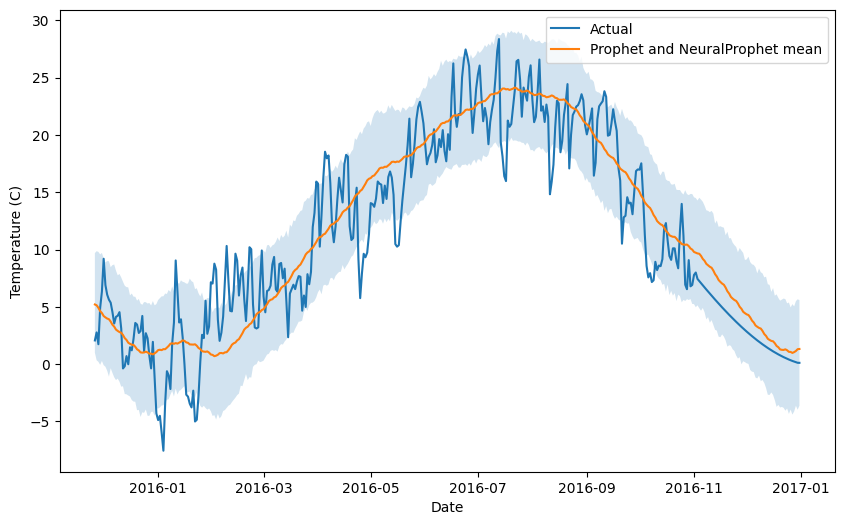

In [13]:
plt.figure(figsize=(10, 6))

# Plot the actual values
plt.plot(train_test_future['ds'], train_test_future['temp'], label='Actual')

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(train_test_future['ds'], train_test_future['mean'], label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(train_test_future['ds'], train_test_future['yhat_upper'], train_test_future['yhat_lower'], alpha=0.2)

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (C)')

# Show the plot
plt.show()

From the above graph, we can clearly see that both Prophet and NeuralProphet have performed well. The shaded region shows the maximum and minimum temperatures. The orange line passes perfectly in the middle of the actual temperature. There are some points on the graph where we can see that the model has not performed well. This can be because weather is difficult to predict. Overall, the model has made a good prediction.

## Now using both Prophet and NeuralProphet libraries to make forecasts on 4 different time series data - temperature, wind, humidity, and pressure for next 30 days

For each variable, the code first fits a Prophet model to the data and uses it to make a 30-day forecast. It then fits a NeuralProphet model to the same data and also uses it to make a 30-day forecast.

The code loads the time-series data of <code>temperature, wind, humidity, and pressure</code>, and fits Prophet and NeuralProphet models to each of them. It then generates 30-day forecasts for each model and merges them to get the mean forecast. Finally, it plots the mean forecast along with the upper and lower bounds of the forecast generated by each model.

The plot shows that the mean forecast generated by <code>Prophet</code> and <code>NeuralProphet</code> models is quite similar, with small differences in the upper and lower bounds. It also shows that the NeuralProphet model generates slightly wider bounds compared to the Prophet model, indicating higher uncertainty in the forecast. Overall, the code provides a simple and efficient way to compare the performance of Prophet and NeuralProphet models on different time-series datasets.

13:48:54 - cmdstanpy - INFO - Chain [1] start processing
13:48:54 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 130
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (126) is too small than the required number for the learning rate finder (240). The results might not be optimal.


Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 126it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


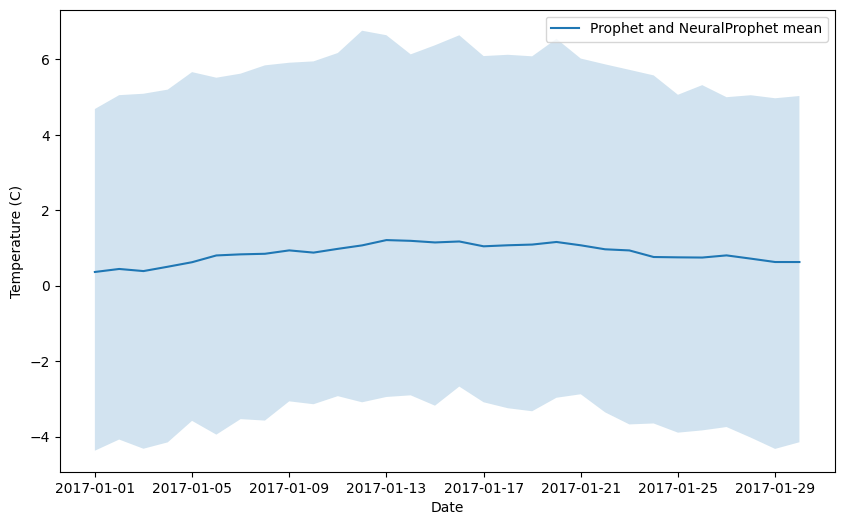

In [14]:
from neuralprophet import NeuralProphet
from prophet import Prophet

model = Prophet()
model.fit(temp)

future = model.make_future_dataframe(periods=30)
temp_forecast_1 = model.predict(future)


model = NeuralProphet()
model.fit(temp)
forecasts_2 = model.make_future_dataframe(df=temp, periods=30)
temp_forecast_2 = model.predict(forecasts_2)

future_temp = pd.merge(temp_forecast_1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], temp_forecast_2[['ds', 'yhat1']], on='ds')
future_temp = future_temp.rename(columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_temp['mean'] = (future_temp['Prophet'] + future_temp['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_temp['ds'], future_temp['mean'], label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_temp['ds'], future_temp['yhat_upper'],
                 future_temp['yhat_lower'], alpha=0.2)

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature (C)')

# Show the plot
plt.show()


13:51:07 - cmdstanpy - INFO - Chain [1] start processing
13:51:08 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 130
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (126) is too small than the required number for the learning rate finder (240). The results might not be optimal.


Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 126it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


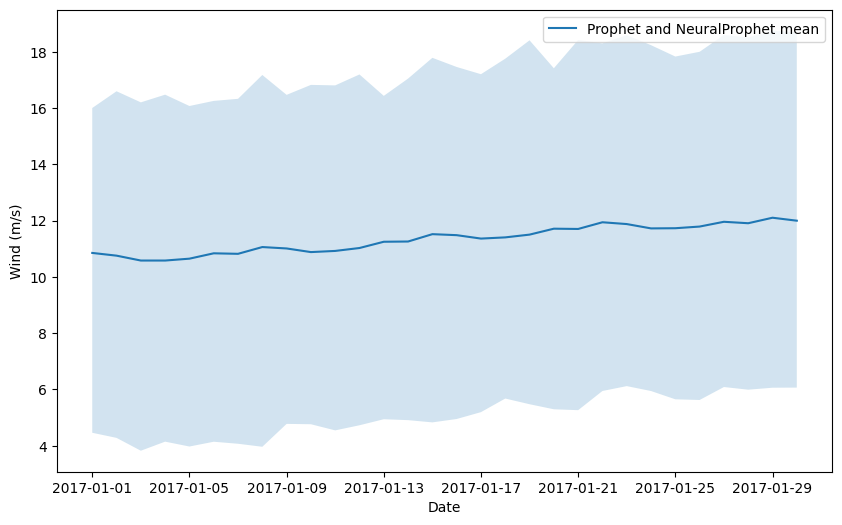

In [15]:
from neuralprophet import NeuralProphet
from prophet import Prophet

model = Prophet()
model.fit(wind)

future = model.make_future_dataframe(periods=30)
wind_forecast_1 = model.predict(future)


model = NeuralProphet()
model.fit(wind)
forecasts_2 = model.make_future_dataframe(df=wind, periods=30)
wind_forecast_2 = model.predict(forecasts_2)

future_wind = pd.merge(wind_forecast_1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], wind_forecast_2[['ds', 'yhat1']], on='ds')
future_wind = future_wind.rename(columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_wind['mean'] = (future_wind['Prophet'] + future_wind['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_wind['ds'], future_wind['mean'], label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_wind['ds'], future_wind['yhat_upper'],
                 future_wind['yhat_lower'], alpha=0.2)

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Wind (m/s)')

# Show the plot
plt.show()


13:53:03 - cmdstanpy - INFO - Chain [1] start processing
13:53:03 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 130
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (126) is too small than the required number for the learning rate finder (240). The results might not be optimal.


Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 126it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


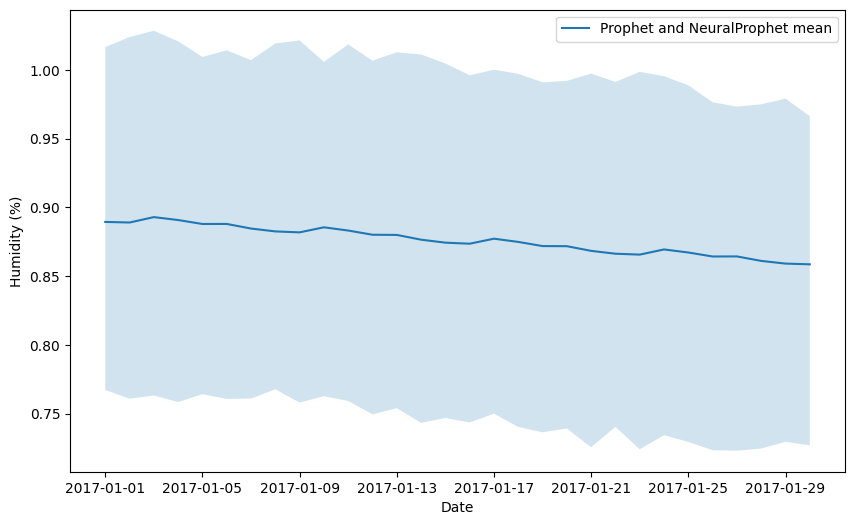

In [16]:
from neuralprophet import NeuralProphet
from prophet import Prophet

model = Prophet()
model.fit(hum)

future = model.make_future_dataframe(periods=30)
hum_forecast_1 = model.predict(future)


model = NeuralProphet()
model.fit(hum)
forecasts_2 = model.make_future_dataframe(df=hum, periods=30)
hum_forecast_2 = model.predict(forecasts_2)

future_hum = pd.merge(hum_forecast_1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], hum_forecast_2[['ds', 'yhat1']], on='ds')
future_hum = future_hum.rename(columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_hum['mean'] = (future_hum['Prophet'] + future_hum['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_hum['ds'], future_hum['mean'], label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_hum['ds'], future_hum['yhat_upper'],
                 future_hum['yhat_lower'], alpha=0.2)

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Humidity (%)')

# Show the plot
plt.show()


13:54:52 - cmdstanpy - INFO - Chain [1] start processing
13:54:53 - cmdstanpy - INFO - Chain [1] done processing
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 130
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (126) is too small than the required number for the learning rate finder (240). The results might not be optimal.


Finding best initial lr:   0%|          | 0/240 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.975% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 126it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


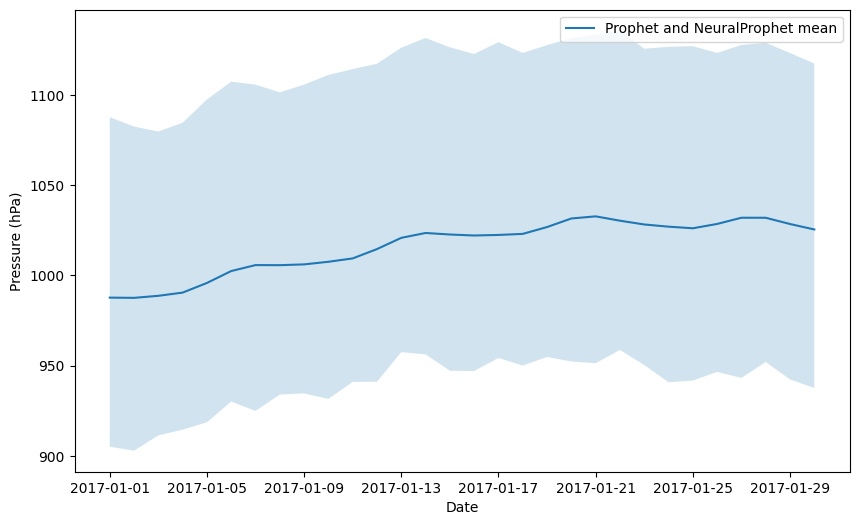

In [17]:
from neuralprophet import NeuralProphet
from prophet import Prophet

model = Prophet()
model.fit(press)

future = model.make_future_dataframe(periods=30)
press_forecast_1 = model.predict(future)


model = NeuralProphet()
model.fit(press)
forecasts_2 = model.make_future_dataframe(df=press, periods=30)
press_forecast_2 = model.predict(forecasts_2)

future_press = pd.merge(press_forecast_1[[
                      'ds', 'yhat', 'yhat_upper', 'yhat_lower']], press_forecast_2[['ds', 'yhat1']], on='ds')
future_press = future_press.rename(
    columns={'ds': 'ds', 'yhat': 'Prophet', 'yhat1': 'NeuralProphet'})
future_press['mean'] = (future_press['Prophet'] + future_press['NeuralProphet']) / 2

plt.figure(figsize=(10, 6))

# Plot the Prophet and NeuralProphet mean forecasted values
plt.plot(future_press['ds'], future_press['mean'],
         label='Prophet and NeuralProphet mean')

# Add a shaded region between the upper and lower bounds of the forecast
plt.fill_between(future_press['ds'], future_press['yhat_upper'],
                 future_press['yhat_lower'], alpha=0.2)

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')

# Show the plot
plt.show()


## Now on forecast generated by Prophet and NeuralProphet models lets predict what will be the weather on that day and what will be the precipitation

First lets creates a new pandas DataFrame called <code>future_30</code>.

The below code block combains data for the next 30 days, with columns for <code>'ds' (datestamp), 'temp' (temperature), 'hum' (humidity), 'wind' (wind speed), and 'press' (atmospheric pressure)</code>.

The data is taken from separate pandas DataFrames called <code>'future_temp', 'future_wind', 'future_hum', and 'future_press'</code>, which contain information on the mean temperature, wind speed, humidity, and atmospheric pressure for the next 30 days, respectively.

The code then resets the index of <code>future_30</code> to start at 0 and drops the old index column, resulting in a DataFrame with columns for datestamp and weather variables for the next 30 days.

In [18]:
future_30 = pd.DataFrame({
    'ds': future_temp['ds'],
    'temp': future_temp['mean'],
    'hum': future_wind['mean'],
    'wind': future_hum['mean'],
    'press': future_press['mean'],
})
future_30 = future_30.reset_index()

future_30 = future_30.drop('index', axis=1)
future_30


,ds,temp,hum,wind,press
0,2017-01-01,0.362379,10.851561,0.889438,987.651807
1,2017-01-02,0.441995,10.754636,0.889010,987.525765
2,2017-01-03,0.386031,10.580994,0.892936,988.655147
3,2017-01-04,0.501413,10.581039,0.890808,990.440363
4,2017-01-05,0.621089,10.647702,0.887939,995.771775
5,2017-01-06,0.800448,10.838097,0.887968,1002.375053
6,2017-01-07,0.829614,10.819820,0.884623,1005.671357
7,2017-01-08,0.844588,11.060339,0.882546,1005.625200
8,2017-01-09,0.934538,11.010497,0.881845,1006.060247
9,2017-01-10,0.875736,10.881438,0.885523,1007.509452


In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le_summary = LabelEncoder()
le_precip = LabelEncoder()
# Fit the encoder to the labels and transform them
encoded_labels_summarry = le_summary.fit_transform(daily_temperatures['summary'])
print('Encoded labels:', encoded_labels_summarry)
daily_temperatures['summary'] = encoded_labels_summarry

encoded_labels_precipitation = le_precip.fit_transform(daily_temperatures['precip'])
print('Encoded labels:', encoded_labels_precipitation)
daily_temperatures['precip'] = encoded_labels_precipitation


Encoded labels: [9 7 8 ... 7 7 7]
Encoded labels: [1 1 1 ... 2 2 2]


The above code block performing label encoding on the <code>summary</code> and <code>precip</code> columns of the 'daily_temperatures' dataframe using the LabelEncoder class from the scikit-learn library.

First, two LabelEncoder objects are created using the <code>LabelEncoder()</code> constructor. Then, the <code></code>fit_transform()</code> method of each encoder is called on the <code>summary</code>  and <code>precip</code> columns of the 'daily_temperatures' dataframe. This method fits the encoder to the labels in the column and returns an encoded version of the labels.

The encoded labels for <code>summary</code> and  <code>precip</code> are then printed to the console using the print() function. Finally, the <code>summary</code> and  <code>precip</code> columns of the 'daily_temperatures' dataframe are replaced with their encoded versions using the indexing operator and the encoded labels.

WARNING - (py.warnings._showwarnmsg) - d:\temp\ipykernel_16120\1175284857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = daily_temperatures.corr()



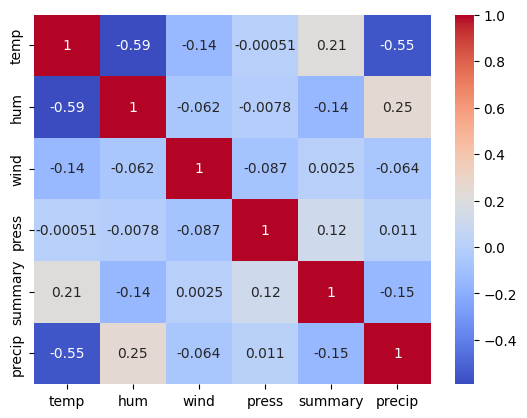

In [20]:
corrMatrix = daily_temperatures.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()


The above code The correlation matrix shows the correlation coefficient between each pair of variables. Based on the correlation matrix, we can see that:

- The temperature is negatively correlated with humidity and precipitation, but positively correlated with the summary.
- The humidity is negatively correlated with the summary, but positively correlated with precipitation.
- The wind is not strongly correlated with any other variable.
- The pressure is not strongly correlated with any other variable.
- The summary is positively correlated with temperature and pressure, but negatively correlated with humidity and precipitation.
- The precipitation is negatively correlated with temperature, but positively correlated with humidity.

Therefore, we can say that the summary is dependent on temperature, humidity, wind, and pressure, but not on precipitation. And precipitation is dependent on humidity but not on the other variables.


### Now with the future values we will predicit Summary and Precipitation

For the prediction we wull be using 5 Classifier they are :

<ol>
<li>DecisionTreeClassifier: It is a decision tree-based algorithm that recursively splits the data based on the features to make a prediction. It is a simple and effective algorithm that is easy to understand and interpret. However, it is prone to overfitting, especially if the tree is deep.</li>

<li>RandomForestClassifier: It is an ensemble learning algorithm that uses multiple decision trees and combines their results to make a prediction. Each tree in the forest is built using a random subset of features and training samples, which helps to reduce overfitting and increase accuracy.</li>

<li>KNeighborsClassifier: It is a simple and effective algorithm that is based on the distance between the input data and the training data. It works by finding the k-nearest neighbors to the input data and using their labels to make a prediction. It is easy to understand and interpret, but can be slow and sensitive to the choice of k.</l1>

<li>GradientBoostingClassifier: It is a boosting algorithm that combines multiple weak models (decision trees) to create a strong model. It works by adding trees sequentially and correcting the errors made by the previous trees. It is a powerful algorithm that can handle complex data, but can be computationally expensive and prone to overfitting.</li>

<li>SVC: It is a support vector machine-based algorithm that finds the hyperplane that best separates the classes in the input data. It works by transforming the data into a higher dimensional space where a linear hyperplane can be used to separate the classes. It is a versatile algorithm that can handle complex data, but can be sensitive to the choice of kernel and parameters.</li>

The 5 classifiers (DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier, GradientBoostingClassifier, SVC) are will be used in ensemble models because they have different strengths and weaknesses, and when combined, they can create a stronger and more robust model.

Ensemble learning is a powerful technique in machine learning where multiple models are combined to improve the accuracy and robustness of the predictions.One popular approach to ensemble learning is to use the VotingClassifier from scikit-learn, which allows us to combine multiple classifiers to make a final prediction based on the majority vote of the individual classifiers.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Prepare the data
X = daily_temperatures[['temp', 'hum', 'wind', 'press']]
y = daily_temperatures['summary'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create individual models
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
svc = SVC()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('dtc', dtc), ('rfc', rfc), ('knn', knn), (
'gb', gb), ('svc', svc)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_score = ensemble.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {ensemble_score}")

summary = ensemble.predict(future_30[['temp', 'hum', 'wind', 'press']])

future_30['summary'] = summary


Ensemble Model Accuracy: 0.5199004975124378


In the above code block, we have use ensemble learning to predict the weather summary for the next 30 days based on temperature, humidity, wind speed, and air pressure. on the base of following models for our ensemble:

- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier
- GradientBoostingClassifier
- SVC

We will first prepare the data by selecting the input features and the target variable. Then, we will split the data into training and testing sets using the train_test_split function from scikit-learn. Next, we will create the individual models and combine them using the VotingClassifier. We will train the ensemble model on the training set and evaluate its accuracy on the testing set. Finally, we will use the ensemble model to predict the weather summary for the next 30 days.


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Prepare the data
X = daily_temperatures[['temp', 'hum', 'wind', 'press','summary']]
y = daily_temperatures['precip'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create individual models
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
svc = SVC()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('dtc', dtc), ('rfc', rfc), ('knn', knn), (
    'gb', gb), ('svc', svc)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_score = ensemble.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {ensemble_score}")

precip = ensemble.predict(future_30[['temp', 'hum', 'wind', 'press','summary']])
future_30['precipitation'] = precip


Ensemble Model Accuracy: 0.9800995024875622


In the above code block, we have use ensemble learning to predict the weather summary for the next 30 days based on temperature, humidity, wind speed air pressure and weather summary. on the base of following models for our ensemble:

- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier
- GradientBoostingClassifier
- SVC

We will first prepare the data by selecting the input features and the target variable. Then, we will split the data into training and testing sets using the train_test_split function from scikit-learn. Next, we will create the individual models and combine them using the VotingClassifier. We will train the ensemble model on the training set and evaluate its accuracy on the testing set. Finally, we will use the ensemble model to predict the precipitation for the next 30 days.

In [23]:
# Decoding the precipitation labels

# Decoding the summary labels
decoded_labels_summary = le_summary.inverse_transform(future_30['summary'])
future_30['summary'] = decoded_labels_summary
print('Decoded labels:', decoded_labels_summary)

decoded_labels_precipitation = le_precip.inverse_transform(future_30['precipitation'])
future_30['precipitation'] = decoded_labels_precipitation
print('Decoded labels:', decoded_labels_precipitation)

Decoded labels: ['Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy'
 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy'
 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy' 'Foggy'
 'Foggy' 'Foggy' 'Foggy']
Decoded labels: ['rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain'
 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain'
 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain']


The above code block is decoding the labels for the 'summary' and 'precip' columns of the 'future_30' dataframe.

The 'le_summary' and 'le_precip' are LabelEncoder objects that were used earlier to encode the labels for these columns into numerical values. The 'inverse_transform' method is used to convert these numerical values back into their original string labels.

The decoded labels for both columns are then assigned back to the 'future_30' dataframe, with the 'summary' and 'precip' columns updated accordingly.

Finally, the decoded labels are printed to the console for both 'summary' and 'precip' column


## Final lets visualization the future prediction

In [24]:
future_30

,ds,temp,hum,wind,press,summary,precipitation
0,2017-01-01,0.362379,10.851561,0.889438,987.651807,Foggy,rain
1,2017-01-02,0.441995,10.754636,0.889010,987.525765,Foggy,rain
2,2017-01-03,0.386031,10.580994,0.892936,988.655147,Foggy,rain
3,2017-01-04,0.501413,10.581039,0.890808,990.440363,Foggy,rain
4,2017-01-05,0.621089,10.647702,0.887939,995.771775,Foggy,rain
5,2017-01-06,0.800448,10.838097,0.887968,1002.375053,Foggy,rain
6,2017-01-07,0.829614,10.819820,0.884623,1005.671357,Foggy,rain
7,2017-01-08,0.844588,11.060339,0.882546,1005.625200,Foggy,rain
8,2017-01-09,0.934538,11.010497,0.881845,1006.060247,Foggy,rain
9,2017-01-10,0.875736,10.881438,0.885523,1007.509452,Foggy,rain


### Time series plot of future 30-day weather forecast variables

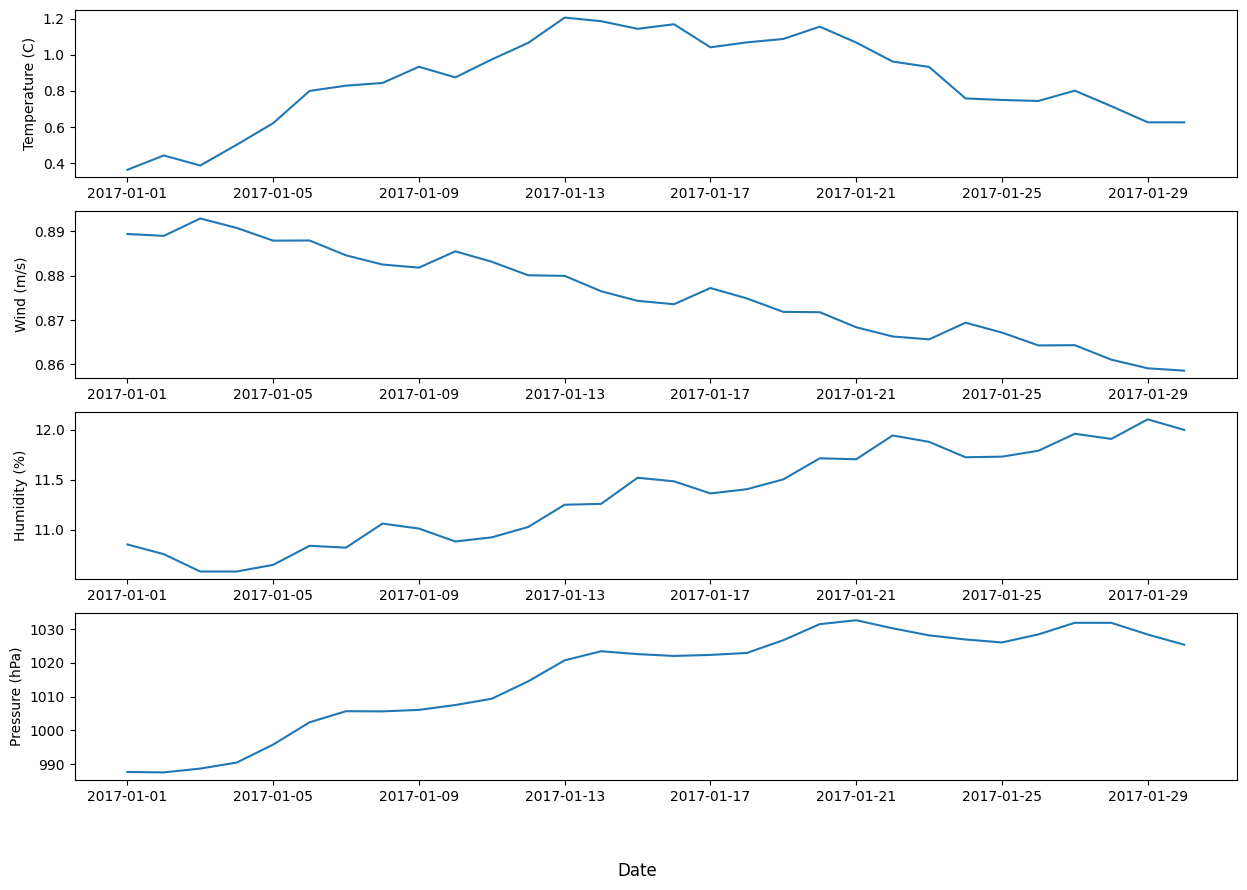

In [25]:
import matplotlib.pyplot as plt

# Create a figure with 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 10))

# Plot the temperature on the first subplot
axs[0].plot(future_30['ds'], future_30['temp'])
axs[0].set_ylabel('Temperature (C)')

# Plot the wind on the second subplot
axs[1].plot(future_30['ds'], future_30['wind'])
axs[1].set_ylabel('Wind (m/s)')

# Plot the humidity on the third subplot
axs[2].plot(future_30['ds'], future_30['hum'])
axs[2].set_ylabel('Humidity (%)')

# Plot the pressure on the fourth subplot
axs[3].plot(future_30['ds'], future_30['press'])
axs[3].set_ylabel('Pressure (hPa)')

# Set a common x-label for all subplots
fig.supxlabel('Date')

# Show the plot
plt.show()


### Distribution of Precipitation Types

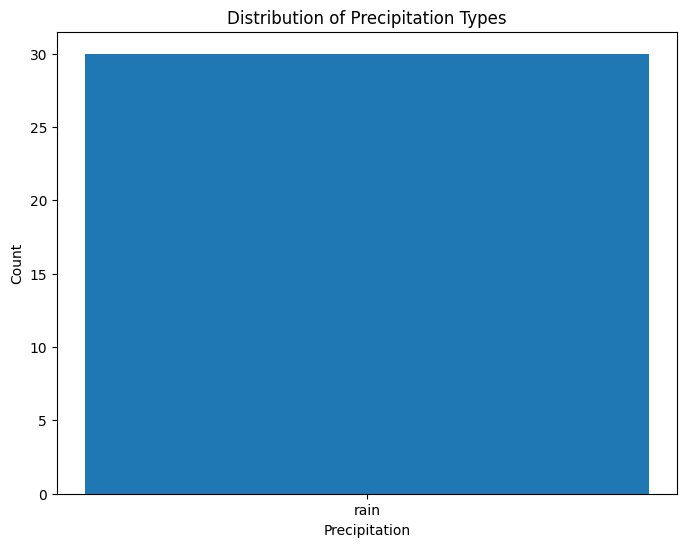

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
precip_counts = future_30['precipitation'].value_counts()
ax.bar(precip_counts.index, precip_counts.values)
ax.set_xlabel('Precipitation')
ax.set_ylabel('Count')
ax.set_title('Distribution of Precipitation Types')
plt.show()


### Description of weather summary

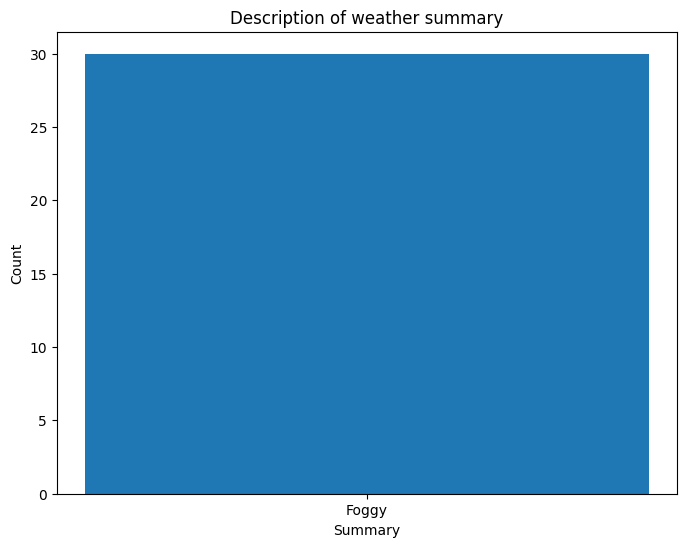

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
precip_counts = future_30['summary'].value_counts()
ax.bar(precip_counts.index, precip_counts.values)
ax.set_xlabel('Summary')
ax.set_ylabel('Count')
ax.set_title('Description of weather summary')
plt.show()


### Distribution of Weather Variables

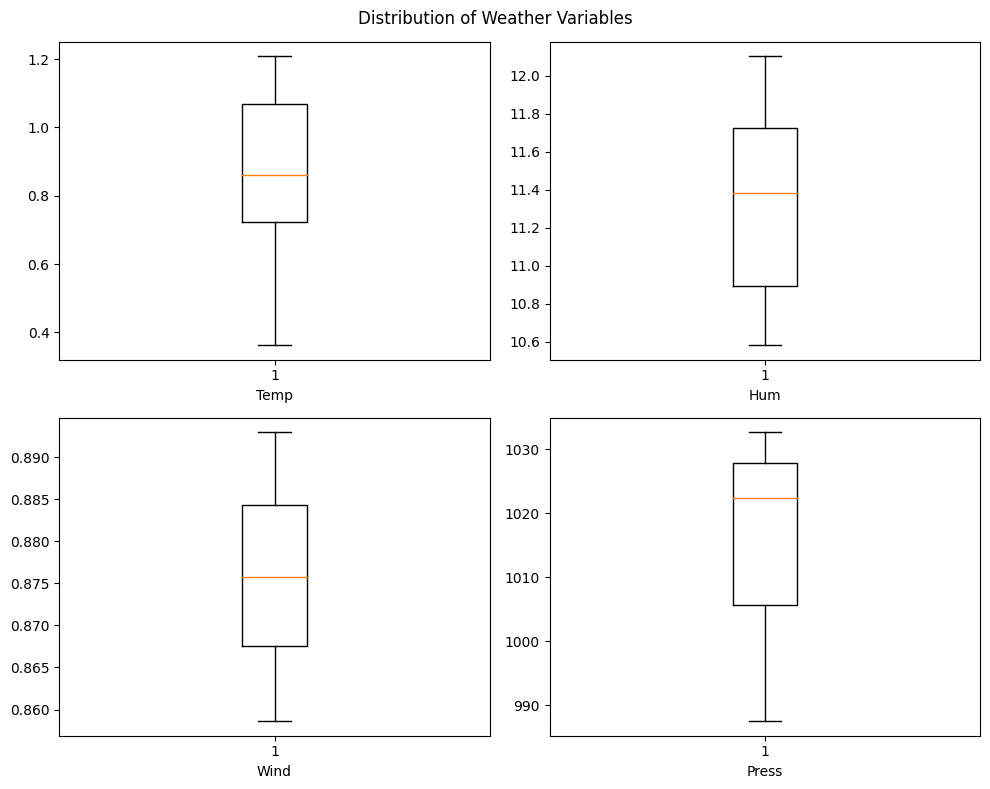

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(['temp', 'hum', 'wind', 'press']):
    axs[i].boxplot(future_30[col])
    axs[i].set_xlabel(col.capitalize())

fig.suptitle('Distribution of Weather Variables')
plt.tight_layout()
plt.show()
